# Gráficos para análise das transações feitas

## Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from extrair_dados import exibir_dados_transacoes


## Definindo o Data Frame

In [2]:
dfTransacoes = exibir_dados_transacoes()
dfTransacoes

c:\Users\pedro\Documents\Estudos\Projetos\analise-transacoes-bancarias\analise\extrair_dados.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  dfTransacoes = pd.read_sql(query, conn)


,Id,RemetenteId,DestinatarioId,Quantia,DataHora,Tipo
0,1,1117,577,3149.73,2025-02-05 21:29:07,PIX
1,2,4615,4615,1185.25,2025-04-01 09:56:15,Saque
2,3,4779,4779,5338.97,2025-02-27 02:29:05,Saque
3,4,3576,3576,1255.69,2025-01-27 17:00:00,Saque
4,5,1959,875,9658.03,2025-01-25 15:06:32,Transferência
...,...,...,...,...,...,...
9995,9996,4540,4540,8926.21,2025-03-13 15:52:18,Depósito
9996,9997,1429,449,4468.62,2025-02-10 20:57:57,Transferência
9997,9998,4710,3190,8003.48,2025-03-06 05:54:13,PIX
9998,9999,403,403,2577.10,2025-02-13 17:24:05,Depósito


## Renomeando as colunas

In [3]:
dfTransacoes.rename(columns={
    "Id": "ID",
    "RemetenteId": "Conta Origem",
    "DestinatarioId": "Conta Destino",
    "Quantia": "Valor (R$)",
    "DataHora": "Data e Hora",
    "Tipo": "Tipo de Transação"
}, inplace=True)

dfTransacoes

,ID,Conta Origem,Conta Destino,Valor (R$),Data e Hora,Tipo de Transação
0,1,1117,577,3149.73,2025-02-05 21:29:07,PIX
1,2,4615,4615,1185.25,2025-04-01 09:56:15,Saque
2,3,4779,4779,5338.97,2025-02-27 02:29:05,Saque
3,4,3576,3576,1255.69,2025-01-27 17:00:00,Saque
4,5,1959,875,9658.03,2025-01-25 15:06:32,Transferência
...,...,...,...,...,...,...
9995,9996,4540,4540,8926.21,2025-03-13 15:52:18,Depósito
9996,9997,1429,449,4468.62,2025-02-10 20:57:57,Transferência
9997,9998,4710,3190,8003.48,2025-03-06 05:54:13,PIX
9998,9999,403,403,2577.10,2025-02-13 17:24:05,Depósito


## Distribuição de Transações por Tipo

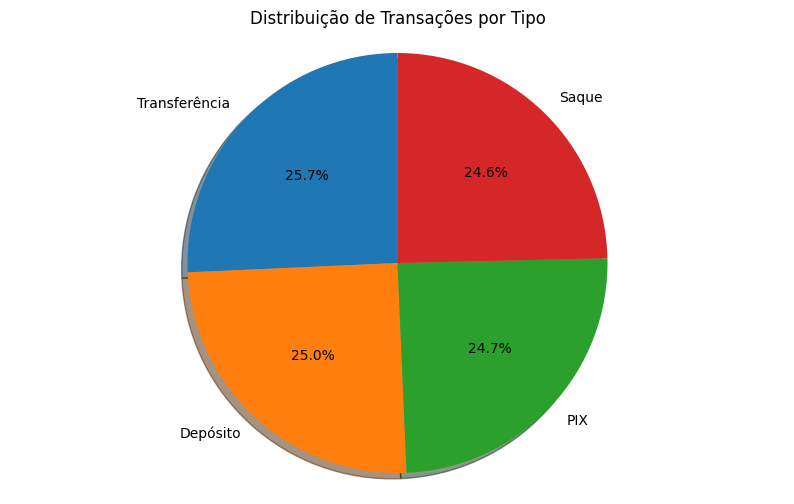

In [ ]:
# Contagem de cada tipo de transação
transaction_counts = dfTransacoes['Tipo de Transação'].value_counts()

# Gráfico de pizza
plt.figure(figsize=(10, 6))
plt.pie(transaction_counts, labels=transaction_counts.index, autopct='%1.1f%%', startangle=90, shadow=True)
plt.title('Distribuição de Transações por Tipo')
plt.axis('equal')  # Para garantir que o gráfico seja circular
plt.show()

## Distribuição de Transações por Usuário

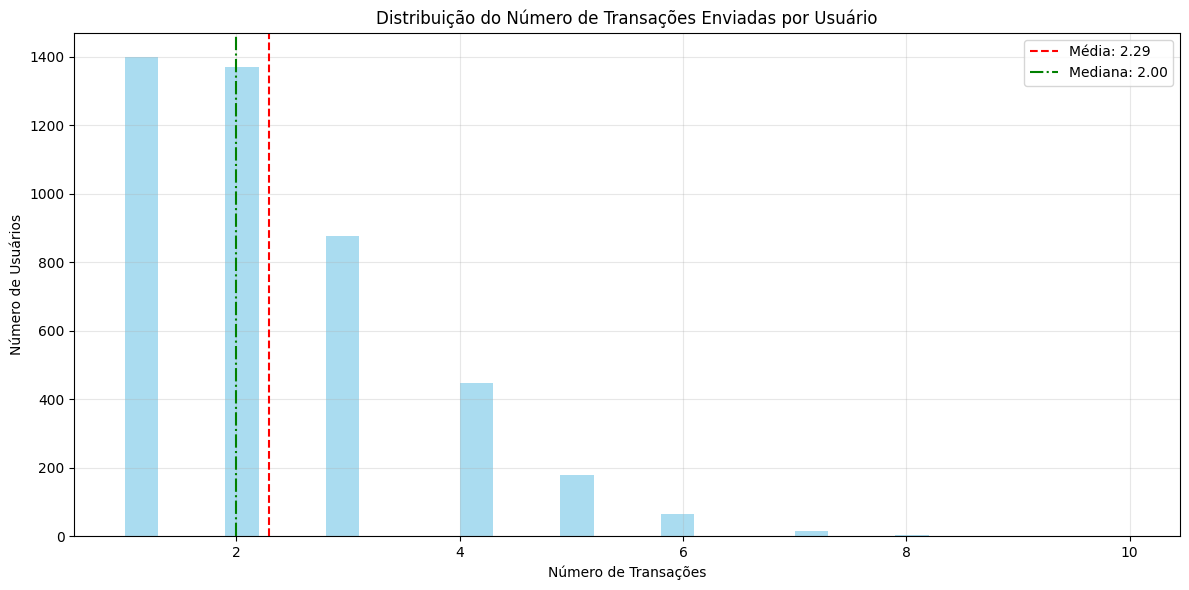

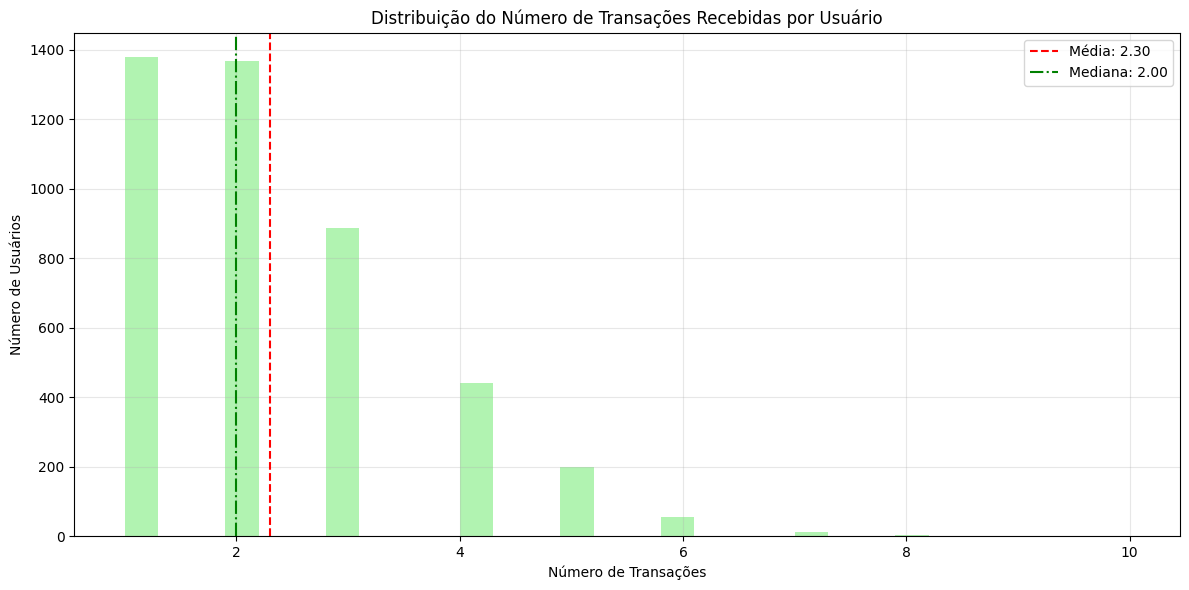

In [10]:
# Contar transações por usuário (como remetente)
transacoes_por_remetente = dfTransacoes['Conta Origem'].value_counts()

# Histograma da distribuição
plt.figure(figsize=(12, 6))
plt.hist(transacoes_por_remetente.values, bins=30, alpha=0.7, color='skyblue')
plt.title('Distribuição do Número de Transações Enviadas por Usuário')
plt.xlabel('Número de Transações')
plt.ylabel('Número de Usuários')
plt.grid(True, alpha=0.3)

# Adicionar estatísticas
media = transacoes_por_remetente.mean()
mediana = transacoes_por_remetente.median()
plt.axvline(x=media, color='red', linestyle='--', label=f'Média: {media:.2f}')
plt.axvline(x=mediana, color='green', linestyle='-.', label=f'Mediana: {mediana:.2f}')
plt.legend()

plt.tight_layout()
plt.show()

# Também analisar transações recebidas
transacoes_por_destinatario = dfTransacoes['Conta Destino'].value_counts()

plt.figure(figsize=(12, 6))
plt.hist(transacoes_por_destinatario.values, bins=30, alpha=0.7, color='lightgreen')
plt.title('Distribuição do Número de Transações Recebidas por Usuário')
plt.xlabel('Número de Transações')
plt.ylabel('Número de Usuários')
plt.grid(True, alpha=0.3)

# Adicionar estatísticas
media = transacoes_por_destinatario.mean()
mediana = transacoes_por_destinatario.median()
plt.axvline(x=media, color='red', linestyle='--', label=f'Média: {media:.2f}')
plt.axvline(x=mediana, color='green', linestyle='-.', label=f'Mediana: {mediana:.2f}')
plt.legend()

plt.tight_layout()
plt.show()
